# Spotify Playlist Analysis


Exploratory Data Analysis is a fundamental process in the field of data science that helps us gain insights into a dataset by summarizing its main characteristics and identifying patterns and relationships within the data. In this assignment, we will be applying exploratory data analysis techniques to a Spotify playlist to better understand the characteristics of the songs in the playlist. Through this exercise, we will learn scraping, visualize distributions, and uncover insights that can help us make informed decisions about the playlist's content and structure. Whether you are a music lover, aspiring data scientist, or simply interested in exploring the power of data, this assignment will provide you with a hands-on experience in exploratory data analysis that you can apply to any dataset. **You have unlimited freedom to use ChatGPT for this assignment, and we recommend it. Please do not forget to save your ChatGPT chats. Do not use different chats, and do not delete your chat history after you complete the assignment. Besides your notebook, you must also submit for your ChatGPT chat links.**


**In this homework, we offer you 2 ways to get data.**

1 - In this assignment, you will analyze a playlist, and this playlist is available as a table on a website. You can scrape the table from this website, we provide HTML content for this. There is a possibility to retrieve the data using BeautifulSoup. You can also get the table directly from the URL using Selenium, and this way will probably be easier. The homework will start with this part and if you successfully capture the data and use it in the homework, you will start with 25 points.

2 - If you do not want to deal with scraping, we will also provide you with the CSV version of the dataset, and you can use it directly. In this case, naturally you will not have completed the scraping part, but you will still be able to complete the remaining parts of the assignment, and you will not receive any points for the scraping part.




Below, you can find all the set of features, provided in the dataset:

1. **Song:** The name of the track.
2. **Artist:** The name of the artist or group that performed the song.
3. **Popularity:** A numerical measure of the song's popularity.
4. **BPM (Beats Per Minute):** The tempo or speed of the song in beats per minute.
5. **Genres:** The musical genres associated with the song.
6. **Parent Genres:** The broader or parent musical genres of the song.
7. **Album:** The name of the album containing the song.
8. **Album Date:** The release date of the album.
9. **Time:** The duration of the song in minutes and seconds.
10. **Dance:** A numerical value indicating danceability.
11. **Energy:** A numerical value representing the energy level of the song.
12. **Acoustic:** A numerical value indicating the acousticness of the song.
13. **Instrumental:** A numerical value indicating the instrumentalness of the song.
14. **Happy:** A numerical value representing the mood or happiness of the song.
15. **Speech:** A numerical value indicating the presence of speech or lyrics in the song.
16. **Live:** Indicates if the song is a live recording (1 for live, 0 for studio).
17. **Loud:** A numerical value indicating the loudness of the song.
18. **Key:** The musical key in which the song is composed.
19. **Time Signature:** The time signature of the song.
20. **Added At:** The date or timestamp when the song was added to the dataset.
21. **Spotify Track Id:** Unique identifiers assigned to each track by Spotify.
22. **Album Label:** The name of the record label associated with the album.
23. **Camelot:** Information about the musical key or tonal center of the song.
24. **Spotify Track Img:** URLs or references to images associated with the Spotify tracks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests
import re

## Q1: Scraping  (25 points)

If you want to scrape the playlist, you can retrieve the data using [this playlist analyzer website](https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG). Here, you should take the Playlist Table, which contains the songs' information, and convert it to DataFrame. As we mentioned at the beginning of the assignment, using Selenium may be a more logical solution since the content of the site is dynamic. But you are also free to use BeautifulSoup, or read the file directly and start data analysis. If you want to use BeautifulSoup, we provided the static version of the webpage. 

In [2]:


# Path to the HTML file
html_file_path = 'Spotify for BeautifulSoup.html'

# Open the HTML file with BeautifulSoup
with open(html_file_path, 'r', encoding='utf-8') as html_file:
    html_content = html_file.read()
    soup = bs4.BeautifulSoup(html_content, 'html.parser')

# Extract data using BeautifulSoup
song_names = soup.findAll("span", {"class": "td-name-text"})
row_informations = soup.findAll("td", {"class": "td-number"})
song_previews = soup.findAll("div", {"class": "track-list-item-right suggest-player-table suggest-player"})
track_images = [img['src'] for img in soup.find_all('img', {'class': 'track-table-img'})]

# Convert data to a numpy array
data = np.array([[i + 1] + [song.get_text(strip=True)] + [artist.get_text(strip=True) for artist in row_informations[i*23+1:i*23+23]] +
                 [song_previews[i]['data-previewurl'], track_images[i]]
                 for i, song in enumerate(song_names)], dtype=object)

# Create a DataFrame
df = pd.DataFrame(data, columns=['#', 'Song', 'Artist', 'Popularity', 'BPM', 'Genres', 'Parent Genres', 'Album', 'Album Date',
                                 'Time', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud',
                                 'Key', 'Time Signature', 'Added At', 'Spotify Track Id', 'Album Label', 'Camelot',
                                 'Song Preview', 'Track Image'])




df['Loud'] = df['Loud'].apply(lambda x: re.sub(r"[^\d.-]", "", str(x)) if pd.notnull(x) else x)

numerical_columns = ['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live','Loud','Time Signature']


df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')


numerical_df = df[numerical_columns]
display(df)


                                    Song Name Artist  \
0                            Crying Lightning      1   
1                              Buzzcut Season      2   
2                             Ode To The Mets      3   
3    Instant Crush (feat. Julian Casablancas)      4   
4                              I Know The End      5   
..                                        ...    ...   
321                                   forever    322   
322                              Silk Chiffon    323   
323         So Hot You're Hurting My Feelings    324   
324                    First Love/Late Spring    325   
325                                      Ribs    326   

                       Popularity BPM Genres  \
0                  Arctic Monkeys  75    107   
1                           Lorde  73    111   
2                     The Strokes  69     92   
3    Daft Punk,Julian Casablancas  78    110   
4                 Phoebe Bridgers   0    111   
..                            ...  ..  

In [11]:
#READ THE DATA DIRECTLY - 0 PTS

Spotify Track Img, Song Preview columns may not be in the data we got from scraping, but we will not use these columns. So you can ignore this columns.

## Q2: Exploring the Dataset (35 points)

Since we complete the scraping, we can finally start deep-diving into the dataset. Now, follow the instructions.

In [12]:
#2pts - show the first 3 rows
df.head(3)

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Song Preview,Track Image
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,...,20,-4,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A,https://p.scdn.co/mp3-preview/2c7443ba5baef95b...,https://i.scdn.co/image/ab67616d00004851f65d72...
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,...,10,-11,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B,null,https://i.scdn.co/image/ab67616d00004851187331...
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,...,10,-5,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A,https://p.scdn.co/mp3-preview/f5b6d13e2e4f3828...,https://i.scdn.co/image/ab67616d00004851bfa99a...


In [13]:
#1pts - show the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 326 non-null    object
 1   Song              326 non-null    object
 2   Artist            326 non-null    object
 3   Popularity        326 non-null    int64 
 4   BPM               326 non-null    int64 
 5   Genres            326 non-null    object
 6   Parent Genres     326 non-null    object
 7   Album             326 non-null    object
 8   Album Date        326 non-null    object
 9   Time              326 non-null    object
 10  Dance             326 non-null    int64 
 11  Energy            326 non-null    int64 
 12  Acoustic          326 non-null    int64 
 13  Instrumental      326 non-null    int64 
 14  Happy             326 non-null    int64 
 15  Speech            326 non-null    int64 
 16  Live              326 non-null    int64 
 17  Loud            

Let's learn more about our dataset. There are various genres in playlists but some of them are more frequent than others. Your task is to determine the top 10 most frequent genres present in the data. Please consider that some songs have multiple genres. And at the end print top 10 genres with their counts.

In [14]:
#2pts - give the statistical summary of numerical columns


numerical_summary = df[numerical_columns].describe()


display(numerical_summary)



,Popularity,BPM,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Time Signature
count,326.00000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,50.41411,122.990798,54.895706,60.478528,28.245399,13.380368,43.625767,0.858896,12.055215,-8.128834,3.929448
std,23.10292,25.101822,14.852345,20.385164,29.670725,24.219816,22.836027,3.906409,12.615376,3.079755,0.320467
min,0.00000,66.000000,11.000000,10.000000,0.000000,0.000000,4.000000,0.000000,0.000000,-20.000000,1.000000
25%,40.00000,106.000000,45.000000,45.000000,2.000000,0.000000,26.000000,0.000000,0.000000,-10.000000,4.000000
50%,55.00000,122.500000,55.000000,61.000000,17.000000,0.000000,41.000000,0.000000,10.000000,-8.000000,4.000000
75%,66.00000,138.000000,66.000000,77.000000,51.750000,13.750000,60.000000,0.000000,17.500000,-6.000000,4.000000
max,93.00000,200.000000,89.000000,98.000000,96.000000,95.000000,98.000000,40.000000,80.000000,-2.000000,4.000000


In [7]:
#5pts


# Split the genres and create a list of all genres
all_genres = [genre.strip() for genres in df['Genres'] for genre in str(genres).split(',')]

# Create a Pandas Series from the list of genres
genres_series = pd.Series(all_genres)

# Get the top 10 most frequent genres
top_genres = genres_series.value_counts().head(10)

# Print the top 10 genres with their counts
print("Top 10 Genres:")
print(top_genres)


Top 10 Genres:
indie rock        113
modern rock       104
art pop            80
rock               74
indie pop          64
chamber pop        58
permanent wave     48
pov: indie         41
indietronica       38
garage rock        37
Name: count, dtype: int64


Let's make the analysis a little more detailed. Specifically, you are required to find and display the top 5 most popular music genres based on their average popularity score, but please only consider genres that appear more than 10 times in the dataset. And at the end print top_genres with their popularity score.

In [17]:



genres_series = df['Genres']

# Split the genres and create a list of all genres
all_genres = [genre.strip() for genres in genres_series for genre in genres.split(',')]

# Create a Pandas Series from the list of genres
genres_series = pd.Series(all_genres)

# Count the occurrences of each genre
genre_counts = genres_series.value_counts()

# Filter genres that appear more than 10 times
popular_genres = genre_counts[genre_counts > 10].index

# Filter the original DataFrame to include only rows where at least one genre is in popular_genres
filtered_df = df[df['Genres'].apply(lambda genres: any(genre.strip() in popular_genres for genre in genres.split(',')))].copy()

# Create a list to store genre and popularity data
data_list = []

# Split the genres in the filtered DataFrame and create a list of all genres
for index, row in filtered_df.iterrows():
    genres_list = [genre.strip() for genre in row['Genres'].split(',')]
    for genre in genres_list:
        data_dict = {'Genre': genre}
        for column in ['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud']:
            data_dict[column] = pd.to_numeric(row[column], errors='coerce')
        data_list.append(data_dict)
# Create a DataFrame from the list
genres_popularity_df = pd.DataFrame(data_list)

for index, row in genres_popularity_df.iterrows():
    if row['Genre'] not in popular_genres:
        genres_popularity_df.drop(index, inplace=True)



# Group by genre and calculate the average popularity
average_popularity = genres_popularity_df.groupby('Genre')['Popularity'].mean()

# Get the top 5 most popular genres
top_popular_genres = average_popularity.nlargest(5)

# Print the top 5 genres with their average popularity scores
print("Top 5 Most Popular Genres:")
display(top_popular_genres)

Top 5 Most Popular Genres:


Genre
permanent wave     67.916667
pop                65.823529
sheffield indie    65.645161
garage rock        65.027027
la indie           62.076923
Name: Popularity, dtype: float64

Our dataset contains lots of technical information about the music. Still, we can create different columns for better information source. In this question, we will apply a pretty basic feature engineering approach. Here you need to categorize the music according to popularity and BPM.There will be two new columns named "Popularity_Category" and "BPM_Category". Let it be "High" if its popularity is above the 75th percentile, "Medium" if it falls between 25 and 75 (inclusive), and "Low" for all the others. For BPM, if it is below 100, call it "Slow", if it is between 100 and 130 (inclusive), call it "Medium", and if it is greater than 130, let it be "Fast". Once the categorization is complete, print the value counts for both 'Popularity_Category' and 'BPM_Category'.

In [19]:
# Convert 'Popularity' and 'BPM' columns to numeric
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['BPM'] = pd.to_numeric(df['BPM'], errors='coerce')


# Continue with the categorization process

# Calculate the 25th and 75th percentiles for 'Popularity'
popularity_25th = df['Popularity'].quantile(0.25)
popularity_75th = df['Popularity'].quantile(0.75)

# Create a new column 'Popularity_Category'
df['Popularity_Category'] = np.where(df['Popularity'] > popularity_75th, 'High',
                                     np.where((df['Popularity'] >= popularity_25th) & (df['Popularity'] <= popularity_75th), 'Medium', 'Low'))

# Create a new column 'BPM_Category'
df['BPM_Category'] = np.where(df['BPM'] < 100, 'Slow',
                              np.where((df['BPM'] >= 100) & (df['BPM'] <= 130), 'Medium', 'Fast'))

# Print the value counts for 'Popularity_Category' and 'BPM_Category'
print("Popularity Category Counts:")
print(df['Popularity_Category'].value_counts())

print("\nBPM Category Counts:")
print(df['BPM_Category'].value_counts())


Popularity Category Counts:
Popularity_Category
Medium    170
High       79
Low        77
Name: count, dtype: int64

BPM Category Counts:
BPM_Category
Medium    160
Fast      107
Slow       59
Name: count, dtype: int64


Let's test our filtering skills. Filtering is a significant skill in data science because in many cases you will only need some part of the dataset. In this question, we will filter a song called Crying Lightning by Arctic Monkeys. It's not a song that is arbitrarily chosen by the assistant, you can also take it as a recommendation. :)

In [21]:
#3pts

# Filter the DataFrame for the song "Crying Lightning" by Arctic Monkeys
filtered_df = df[(df['Song'] == 'Crying Lightning') & (df['Artist'] == 'Arctic Monkeys')]

# Display the filtered DataFrame
display(filtered_df)


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Song Preview,Track Image,Popularity_Category,BPM_Category
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,...,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A,https://p.scdn.co/mp3-preview/2c7443ba5baef95b...,https://i.scdn.co/image/ab67616d00004851f65d72...,High,Medium


Let's do a more advanced filtering operation. Display the name of the most common album among the tracks that have a "High" popularity, a "Fast" BPM, and are also above the 75th percentile in loudness.



In [22]:
#6pts


# Filter based on conditions
filtered_df = df[(df['Popularity_Category'] == 'High') & 
                 (df['BPM_Category'] == 'Fast') & 
                 (df['Loud'] > df['Loud'].quantile(0.75))]


# Find the most common album among the filtered tracks
most_common_album = filtered_df['Album'].mode().iloc[0]

most_common_album


'Favourite Worst Nightmare'

Now, display the Camelot code that is most common among the tracks that belong to the top 10% in terms of popularity.



In [23]:

#5pts

# Calculate the threshold for the top 10% in popularity
popularity_threshold = df['Popularity'].quantile(0.9)

# Filter tracks that belong to the top 10% in popularity
top_10_percent_tracks = df[df['Popularity'] >= popularity_threshold]

# Find the most common Camelot code among the filtered tracks
most_common_camelot = top_10_percent_tracks['Camelot'].mode().iloc[0]

# Display the result
most_common_camelot


'10B'

## Q3: Visualization and Analysis (40 points)

We learned many things about our dataset. Now let's create some visualizations using tools like Matplotlib, Seaborn etc. To warm up let's start with some univariate analysis. 

For the first question:

- Create a subplot matrix.
- Create a histogram for the 'Popularity_Category' variable with a bin size of 30, the color should be red.
- Set the title of the first subplot as 'Popularities.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'Popularity Category.'
- Set the boundaries for the y-axis as 0 to 200.
- Repeat the above steps for the 'BPM_Category' variable, creating a histogram with a bin size of 30 in the second subplot, the color should be blue.
- Set the title of the second subplot as 'BPM Categories.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'BPM Category.'
- Set the boundaries for the y-axis as 0 to 200.

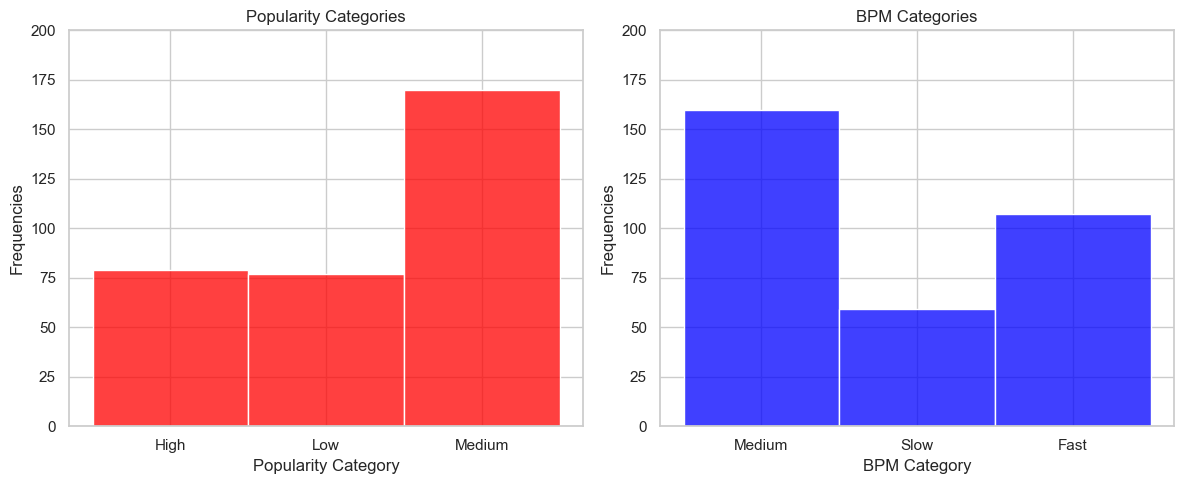

In [24]:
#2pts


# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a subplot matrix
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Create a histogram for 'Popularity_Category' with color settings
sns.histplot(df, x='Popularity_Category', bins=30, color='red', ax=axs[0])  # Tomato color
axs[0].set_title('Popularity Categories')
axs[0].set_ylabel('Frequencies')
axs[0].set_xlabel('Popularity Category')
axs[0].set_ylim(0, 200)

# Create a histogram for 'BPM_Category' with color settings
sns.histplot(df, x='BPM_Category', bins=30, color='blue', ax=axs[1])  # SteelBlue color
axs[1].set_title('BPM Categories')
axs[1].set_ylabel('Frequencies')
axs[1].set_xlabel('BPM Category')
axs[1].set_ylim(0, 200)

# Adjust layout for a better arrangement
plt.tight_layout()

# Show the plots
plt.show()



Now let's do some bi-variate analysis. If we want to plot the relationship between Energy and Loudness, think that which plot would be the appropriate choice.

Visualize the relationship between the two according to the plot you choose. Loudness bounds must be -2-20 and energy limits must be 0-100. 

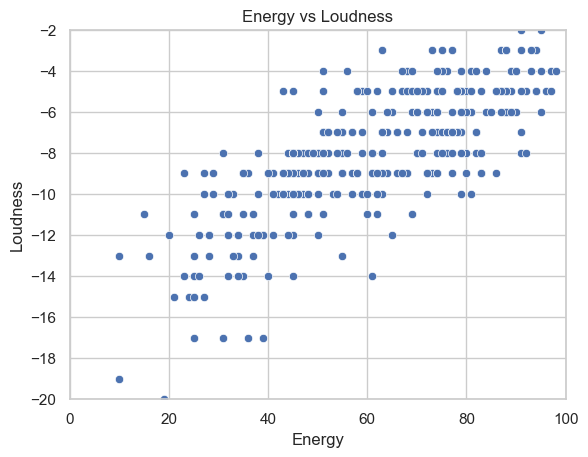

In [26]:
#3pts

# Scatter plot using Seaborn


sns.scatterplot(x='Energy', y='Loud', data=df)
plt.title('Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.xlim(0, 100)  # Energy limits
plt.ylim(-20, -2)   # Loudness bounds
plt.show()


Now, create the plot which displays the average popularity of music albums over the years, with each data point representing a year, you can use a line graph with markers, and includes labels and appropriate y-limits ( It must be 5 units below the minimum popularity and 5 units above the maximum popularity.)  You can also rotate the x tick values ​​by 45 degrees. 


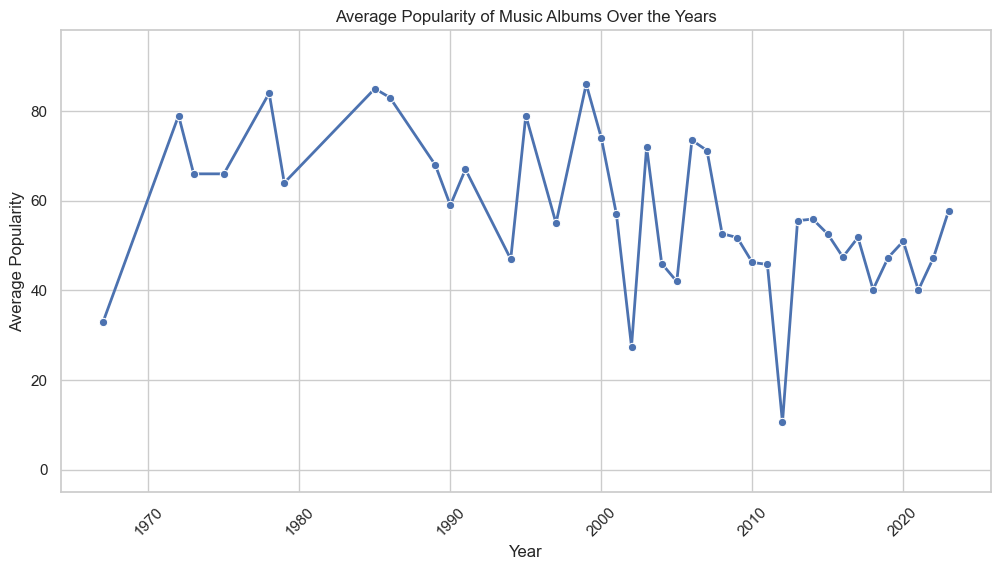

In [27]:
#6pts



# Set Seaborn style
sns.set(style="whitegrid")

# Convert 'Album Date' to datetime
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')

# Extract the year from the 'Album Date'
df['Year'] = df['Album Date'].dt.year

# Group by year and calculate the average popularity
average_popularity_by_year = df.groupby('Year')['Popularity'].mean().reset_index()

# Line plot using Seaborn with thicker line
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Popularity', data=average_popularity_by_year, marker='o', linewidth=2)
plt.title('Average Popularity of Music Albums Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)  # Rotate x tick values by 45 degrees

# Set y-limits
min_popularity = df['Popularity'].min() - 5
max_popularity = df['Popularity'].max() + 5
plt.ylim(min_popularity, max_popularity)

plt.show()

Now, let's create a plot that illustrates the average popularity of music albums across the months of the year. The plot should be in the form of a line graph with markers, with the x-axis representing the months (in a custom order from January to December) and the y-axis representing the average popularity. Make sure to include appropriate labels and set the y-axis limits to be 5 units below the minimum popularity and 5 units above the maximum popularity. Additionally, rotate the x-axis tick values by 45 degrees for better readability. 

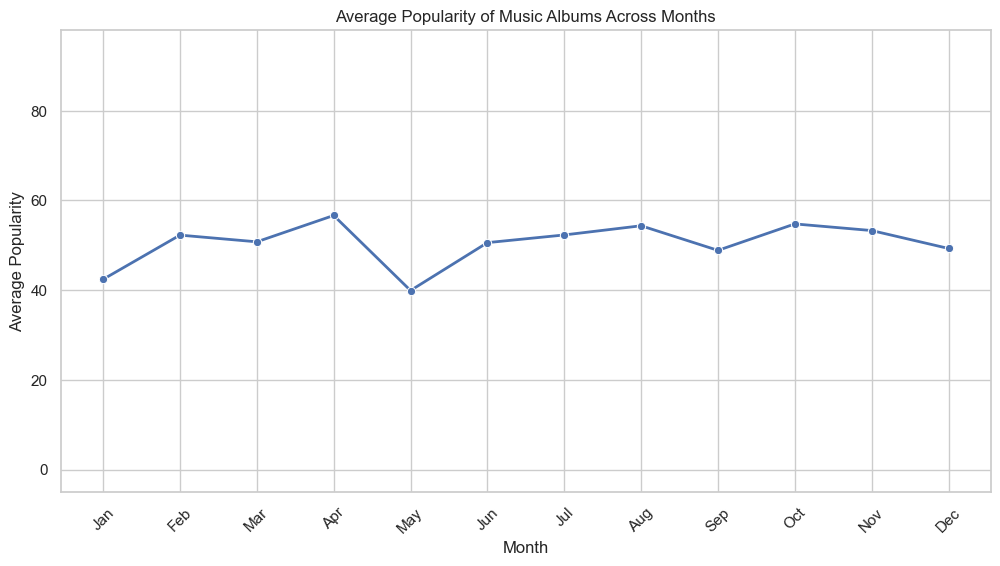

In [29]:
#6 pts

import calendar

# Assuming 'df' is your DataFrame
df_copy = df.copy()  # Create a copy to avoid modifying the original DataFrame

# Convert 'Album Date' to datetime
df_copy['Album Date'] = pd.to_datetime(df_copy['Album Date'], errors='coerce')

# Filter out rows with invalid or missing dates
df_copy = df_copy[df_copy['Album Date'].notnull()]

# Filter out rows with '1973-00-00' in 'Album Date'
df_copy = df_copy[df_copy['Album Date'].dt.strftime('%Y-%m-%d') != '%Y-00-00']

# Extract the month from the 'Album Date'
df_copy['Month'] = df_copy['Album Date'].dt.month

# Map month numbers to month names for custom order
month_order = [calendar.month_abbr[i] for i in range(1, 13)]
df_copy['Month'] = df_copy['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])

# Group by month and calculate the average popularity
average_popularity_by_month = df_copy.groupby('Month')['Popularity'].mean().reindex(month_order).reset_index()

# Line plot using Seaborn with markers
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Popularity', data=average_popularity_by_month, marker='o', linewidth=2)
plt.title('Average Popularity of Music Albums Across Months')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)  # Rotate x tick values by 45 degrees

# Set y-limits
min_popularity = df_copy['Popularity'].min() - 5
max_popularity = df_copy['Popularity'].max() + 5
plt.ylim(min_popularity, max_popularity)

plt.show()

# df_copy DataFrame is used for visualization, and the original 'df' DataFrame remains unchanged


Let's create more sophisticated plot. In this question you will also make some operations on the dataset again.

Visualize and compare the BPM (Beats Per Minute) levels in the music of four different artists: Lorde, Big Thief, Wolf Alice and Phoebe Bridgers. The data is presented in a countplot with three categories for BPM levels: Slow, Medium, and Fast. Each artist's contribution to each BPM category is shown using a different color. The y-axis represents the frequency of songs falling into each BPM category. Set the y-axis limits to a range of 0 to 10 for better clarity.

You already see the answer below as an example, you can use inferno as the color code. There may be slight differences in styling, but we expect a very similar answer. Please be careful with the order of x-axis.


<img src="https://i.imgur.com/EAk2mcB.png" alt="barplot-210" border="0" width="500">


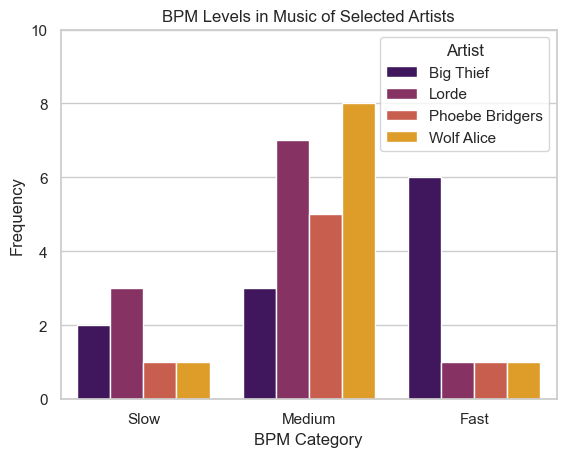

In [31]:
#7pts


# Desired order of artists
selected_artists = ['Big Thief', 'Lorde', 'Phoebe Bridgers', 'Wolf Alice']

# Filter the data for the selected artists
filtered_df = df[df['Artist'].isin(selected_artists)]

# Define the order of BPM categories
bpm_order = ['Slow', 'Medium', 'Fast']

# Set up the color palette
palette = sns.color_palette("inferno", len(selected_artists))

# Create the countplot
sns.countplot(x='BPM_Category', hue='Artist', data=filtered_df, order=bpm_order, hue_order=selected_artists, palette=palette)

# Set plot labels and title
plt.xlabel('BPM Category')
plt.ylabel('Frequency')
plt.title('BPM Levels in Music of Selected Artists')

# Set y-axis limits for better clarity
plt.ylim(0, 10)

# Show the legend
plt.legend(title='Artist')

# Display the plot
plt.show()


We are approaching the end. Visualize the aggregated Energy and Acoustic values of songs categorized by the top 10 most common genres in the dataset.

The final visualization should be a stacked bar chart where each bar represents one of the top 10 genres, and the height of the colored segments within each bar denotes the sum of Energy and Acoustic values for songs in that genre. This allows for a quick comparative view of how energetic or acoustic songs from each of the top genres tend to be.

You already see the answer below as an example, you can use ['#669bbc', '#003049'] colors. There may be slight differences in styling, but we expect a very similar answer.


<img src="https://i.imgur.com/eM0q688.png" alt="barplot-210" border="0" width="500">


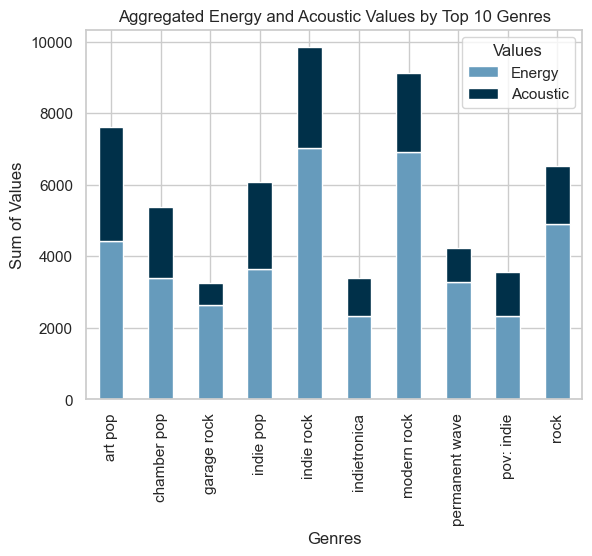

In [33]:
#7pts


# Get the top 10 most common genres
top_genres = genre_counts.nlargest(10).index

# Filter the DataFrame to include only rows with one of the top 10 genres
top_genres_df = genres_popularity_df[genres_popularity_df['Genre'].isin(top_genres)].copy()

# Group by genre and calculate the sum of Energy and Acoustic values
genre_energy_acoustic_sum = top_genres_df.groupby('Genre')[['Energy', 'Acoustic']].sum()

# Create a stacked bar chart
genre_energy_acoustic_sum.plot(kind='bar', stacked=True, color=['#669bbc', '#003049'])
plt.title('Aggregated Energy and Acoustic Values by Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Sum of Values')
plt.legend(title='Values', loc='upper right')
plt.show()




Now, show the correlations of numerical columns in a heatmap, don't forget that you must only use numerical columns. You can use inferno as a color map.

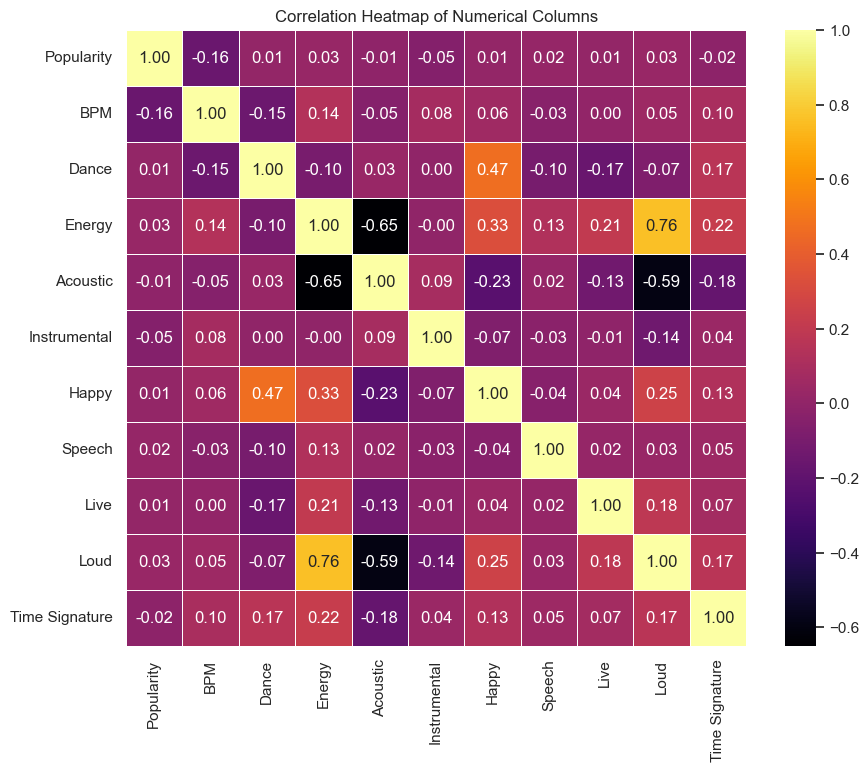

In [35]:
#4pts



# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()



Congratulations! You've reached the end of your assignment. In this assignment, we dealt with data questions about albums, artists, and many music related data over Spotify data. I hope it has been a fun process.

**If you want to listen to the playlist we analyzed:**
https://open.spotify.com/playlist/4wyQnWDDys6T8A2ni96VfG?si=1c69c078d81f47f5

See you later!
    
<img src="https://i.imgur.com/KSbQFe7.png" alt="barplot-210" border="0" width="300">

***dall-e prompt***: an oil painting of data science student does homework in pain

